In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy.
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

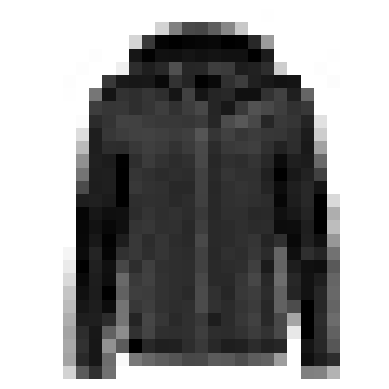

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

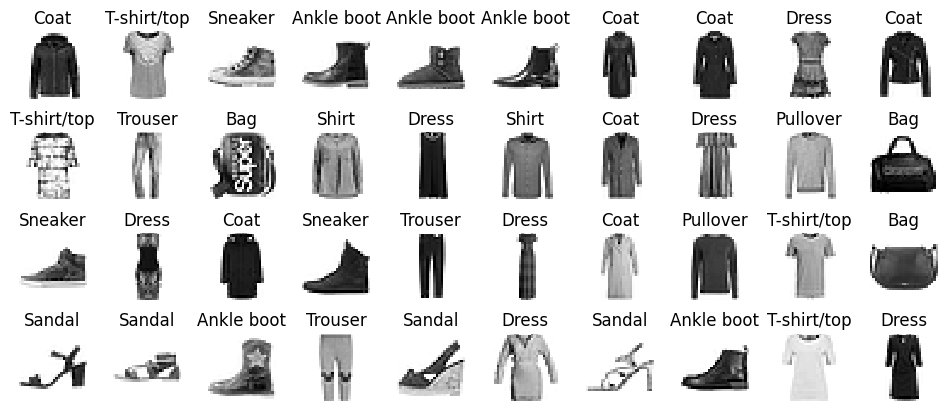

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Porównaj wyniki architektury fully connected (najlepszej jaką uda ci się zbudować) i architektury konwolucyjnej (najlepszej jaką uda ci się zbudować).


Wizualizuj wyniki:

* porównaj krzywe uczenia


In [12]:
# We begin by defining the a empty stack. We'll use this for building our
# network, later by layer.
model = tf.keras.models.Sequential()

# We start with a convolutional layer this will extract features from
# the input images by sliding a convolution filter over the input image,
# resulting in a feature map.
model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters we will learn
        kernel_size=(3, 3), # Size of feature map that will slide over image
        strides=(1, 1), # How the feature map "steps" across the image
        padding='valid', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1) # The expected input shape for this layer
    )
)

# The next layer we will add is a Maxpooling layer. This will reduce the
# dimensionality of each feature, which reduces the number of parameters that
# the model needs to learn, which shortens training time.
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        strides=(2, 2) # How the pool "steps" across the feature
    )
)

# We'll now add a dropout layer. This fights overfitting and forces the model to
# learn multiple representations of the same data by randomly disabling neurons
# in the learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# Output from previous layer is a 3D tensor. This must be flattened to a 1D
# vector before beiung fed to the Dense Layers.
model.add(
    tf.keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features
# to the required class.
model.add(
    tf.keras.layers.Dense(
        units=128, # Output shape
        activation='relu' # Rectified Linear Unit Activation Function
    )
)

# Final layer with 10 outputs and a softmax activation. Softmax activation
# enables me to calculate the output based on the probabilities.
# Each class is assigned a probability and the class with the maximum
# probability is the model’s output for the input.
model.add(
    tf.keras.layers.Dense(
        units=10, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
history = model.fit(

      # Training data : features (images) and classes.
      X_train, y_train,

      # number of samples to work through before updating the
      # internal model parameters via back propagation.
      batch_size=256,

      # An epoch is an iteration over the entire training data.
      epochs=10,

      # The model will set apart his fraction of the training
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of
      # each epoch.
      validation_split=0.2,

      verbose=1)

Epoch 1/10
172/172 [==============================] - 33s 178ms/step - loss: 0.5712 - accuracy: 0.8009 - val_loss: 0.4240 - val_accuracy: 0.8503
Epoch 2/10
172/172 [==============================] - 28s 164ms/step - loss: 0.3806 - accuracy: 0.8647 - val_loss: 0.3492 - val_accuracy: 0.8783
Epoch 3/10
172/172 [==============================] - 30s 172ms/step - loss: 0.3339 - accuracy: 0.8810 - val_loss: 0.3187 - val_accuracy: 0.8879
Epoch 4/10
172/172 [==============================] - 29s 168ms/step - loss: 0.3020 - accuracy: 0.8924 - val_loss: 0.2971 - val_accuracy: 0.8946
Epoch 5/10
172/172 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8985

KeyboardInterrupt: ignored

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


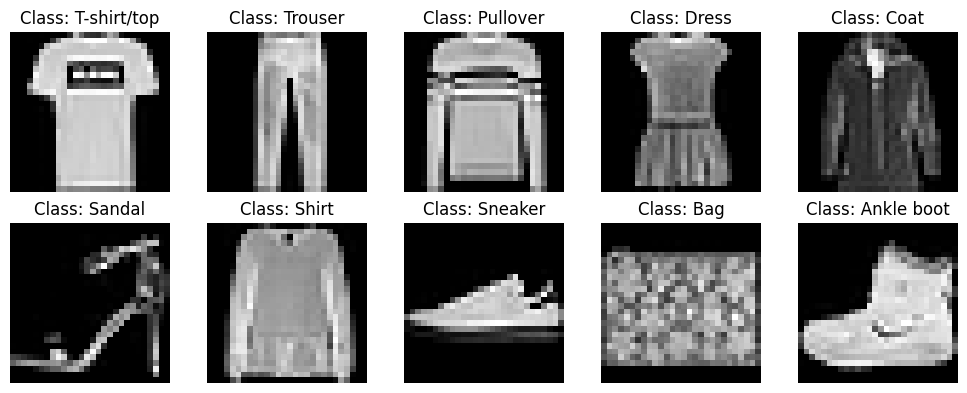

In [26]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
class_labels_dict = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
X_train /= 255
X_test /= 255
num_classes = 10 # There are 10 classes possible
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


model = Sequential() # Declare a Sequential model
model.add(Dense(512, input_shape=(784,))) # Add a dense input layer of 512 units
                                        # The input shape is (784,) because the features are 784 dimensional vectors
model.add(Activation('relu')) # Apply ReLu activation function to the layer output
model.add(Dropout(0.2)) # Dropout helps prevent the model from overfitting on the training data
model.add(Dense(512)) # Add a hidden layer of 512 units
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10)) # Add an output layer of 10 units, the number of classes
model.add(Activation('softmax')) # The "softmax" activation ensures the output is a valid probability distribution

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))

Epoch 1/25
469/469 [==============================] - 12s 23ms/step - loss: 0.5108 - accuracy: 0.8164 - val_loss: 0.4432 - val_accuracy: 0.8418
Epoch 2/25
264/469 [===============>..............] - ETA: 4s - loss: 0.3898 - accuracy: 0.8571

KeyboardInterrupt: ignored